In [6]:
import netCDF4 as nc
import numpy as np
from numpy.random import uniform, normal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
import glob
import pandas as pd
import json

from itertools import product

In [7]:
# from phase_transition.ipynb
# for 0.5 < A < 4.5
coeffs = [0.02814013, -0.35001042, 1.60003947, -2.34595609, 3.0677753]

pt_est = np.poly1d(coeffs)

In [1]:
n_A = 10
n_B_stable = 2
n_B_crit = 9
n_B_osc = 9
n_Du = 3
n_Dv = 3

n_points = n_A * (n_B_stable + n_B_crit + n_B_osc) * n_Du * n_Dv
A_min = 0.5
A_max = 4.5

crit_radius = 0.1
sigma_left = 0.5
sigma_right = 0.25
print(f"n_points = {n_points}")

n_points = 1800


<Axes: xlabel='A', ylabel='B_A'>

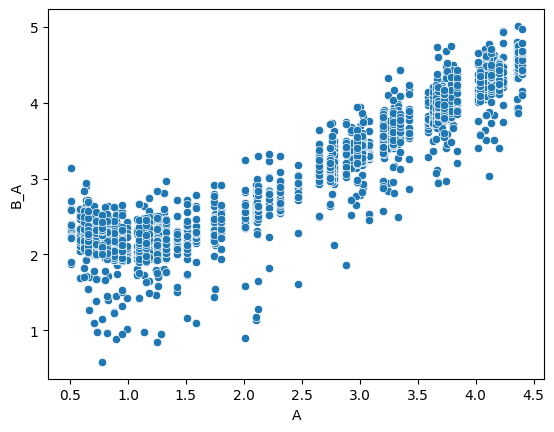

In [11]:
vals = []
for _ in range(n_Du):
    for _ in range(n_Dv):
        Du = uniform(0.75, 2.25)
        Dv_mult = uniform(5, 15)
        for _ in range(n_A):
            A = uniform(A_min, A_max)
            pt = pt_est(A)
            for _ in range(n_B_stable):
                eps = np.abs(normal(0, sigma_left))
                B_A = pt - crit_radius - eps
                
                vals.append((A, A * B_A, Du, Du * Dv_mult))
            for _ in range(n_B_crit):
                B_A_min = pt - crit_radius
                B_A_max = pt + crit_radius
                B_A = uniform(B_A_min, B_A_max)
                vals.append((A, A * B_A, Du, Du * Dv_mult))
            for _ in range(n_B_osc):
                eps = np.abs(normal(0, sigma_right))
                B_A = pt + crit_radius + eps
                vals.append((A, A * B_A, Du, Du * Dv_mult))

df = pd.DataFrame(vals, columns=["A", "B", "Du", "Dv"])
df["B_A"] = df["B"] / df["A"]
sns.scatterplot(df, x="A", y="B_A")

In [10]:
df.to_csv("../data/param_sweep.csv", index=False)